In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Пример №1
x, y = sp.symbols("x y")
z = x**3 + y**2
dx, dy, dz, d = sp.symbols("dx dy dz d")
sp.pprint(dz/dx)
sp.pprint(sp.diff(z, x))
print('----------------')
sp.pprint(dz/dy)
sp.pprint(sp.diff(z, y))
print('----------------')
sp.pprint(d*dz/dx**2)
sp.pprint(sp.diff(z, x, 2))
print('----------------')
sp.pprint(d*dz/dy**2)
sp.pprint(sp.diff(z, y, 2))

dz
──
dx
   2
3⋅x 
----------------
dz
──
dy
2⋅y
----------------
d⋅dz
────
  2 
dx  
6⋅x
----------------
d⋅dz
────
  2 
dy  
2


In [3]:
# УПРАЖНЕНИЕ 1
# а)
x, y = sp.symbols("x y")
z = sp.cos(3*x + y**2)
print("dz/dx")
print(sp.diff(z, x))
print("\ndz/dy")
print(sp.diff(z, y))
print("\nddz/dx**2")
print(sp.diff(z, x, 2))
print("\nddz/dy**2")
print(sp.diff(z, y, 2))

dz/dx
-3*sin(3*x + y**2)

dz/dy
-2*y*sin(3*x + y**2)

ddz/dx**2
-9*cos(3*x + y**2)

ddz/dy**2
-2*(2*y**2*cos(3*x + y**2) + sin(3*x + y**2))


In [4]:
# УПРАЖНЕНИЕ 1
# б)
x, y, z = sp.symbols("x y z")
i, j, k = sp.symbols("i j k")
f = 2*x**3*y + x - z
sp.pprint(f)
print("grad(f) : ")
sp.pprint(sp.diff(f, x) + sp.diff(f, y) + sp.diff(f, z))
print((sp.diff(f, x) * i + sp.diff(f, y) * j + sp.diff(f, z) * k).subs([(x, 1), (y, 2), (z, -3)]))

   3          
2⋅x ⋅y + x - z
grad(f) : 
   3      2  
2⋅x  + 6⋅x ⋅y
13*i + 2*j - k


In [5]:
# Пример 2
r, t = sp.symbols("r t")
x = r * sp.cos(t)
y = r * sp.sin(t)

A = sp.Matrix([[x,y]])
sp.pprint(A)
B = sp.Matrix([ [sp.diff(A, r)],  [sp.diff(A, t)] ])
sp.pprint(B)
sp.pprint(B.det().simplify())

[r⋅cos(t)  r⋅sin(t)]
⎡ cos(t)     sin(t) ⎤
⎢                   ⎥
⎣-r⋅sin(t)  r⋅cos(t)⎦
r


In [6]:
# УПРАЖНЕНИЕ 2
r, p = sp.symbols("r p")
x = r * sp.cos(p)
y = r * sp.sin(p)
z = sp.symbols("z")

A = sp.Matrix([[x, y, z]])
J = sp.Matrix([ [sp.diff(A, r)],  [sp.diff(A, p)],  [sp.diff(A, z)] ])
sp.pprint(B.det().simplify())
# ВЕРНО

r


In [7]:
# УПРАЖНЕНИЕ 3
# a)
x, y = sp.symbols("x y")
z = x * y**2 + 2*y - x**2
dz_dx = sp.diff(z, x)
dz_dy = sp.diff(z, y)
dx, dy = 0.1, -0.2
Point = [2, -1]
dz  = dz_dx.subs([(x , Point[0]), (y, Point[1])]) * dx 
dz += dz_dy.subs([(x , Point[0]), (y, Point[1])]) * dy 
print(dz)

# б)
def delta_f(f, x0, y0, dx, dy):
    df_dx = sp.diff(z, x)
    df_dy = sp.diff(z, y)
    
    df  = df_dx.subs([(x , x0), (y, y0)]) * dx 
    df += df_dy.subs([(x , x0), (y, y0)]) * dy

    return df 
print(delta_f(z, *Point, 0.1, -0.2)) 

0.100000000000000
0.100000000000000


In [8]:
# УПРАЖНЕНИЕ 4
# a)
x, y = sp.symbols("x y")
z = x * y**2 + 2*y - x**2
dx, dy = 0.1, -0.2
Point = [2, -1]

dz_dx = sp.diff(z, x)
dz_dy = sp.diff(z, y)

d2z_dx2 = sp.diff(dz_dx, x)
d2z_dy2 = sp.diff(dz_dy, y)
d2z_dxdy = sp.diff(dz_dy, x)
d2z_dydx = sp.diff(dz_dx, y)

d2z  = d2z_dx2.subs([(x , Point[0]), (y, Point[1])]) * dx**2 
d2z += d2z_dy2.subs([(x , Point[0]), (y, Point[1])]) * dy**2 
d2z += d2z_dxdy.subs([(x , Point[0]), (y, Point[1])]) * dx * dy 
d2z += d2z_dydx.subs([(x , Point[0]), (y, Point[1])]) * dx * dy
print(d2z)

# б)
def delta_f(f, x0, y0, dx, dy):
    df_dx = sp.diff(f, x)
    df_dy = sp.diff(f, y)

    d2f_dx2 = sp.diff(df_dx, x)
    d2f_dy2 = sp.diff(df_dy, y)
    d2f_dxdy = sp.diff(df_dy, x)
    d2f_dydx = sp.diff(df_dx, y)

    d2f  = d2f_dx2.subs([ (x , x0), (y, y0)]) * dx**2 
    d2f += d2f_dy2.subs([ (x , x0), (y, y0)]) * dy**2 
    d2f += d2f_dxdy.subs([(x , x0), (y, y0)]) * dx * dy 
    d2f += d2f_dydx.subs([(x , x0), (y, y0)]) * dx * dy

    return d2f 
print(delta_f(z, *Point, 0.1, -0.2)) 

0.220000000000000
0.220000000000000


In [9]:
# УПРАЖНЕНИЕ 5
# a)
x, y = sp.symbols("x y")
dx, dy = sp.symbols("dx dy")
z = x * y**2 + 2*y - x**2
dx_value, dy_value = 0.1, -0.2
Point = [2, -1]

# z = x**2 * y + y**2
# dx_value, dy_value = 0.1, -0.1
# Point = [1, 1]

def find_differential(f, order_arg):
    differentials = [[f]]
    for i in range(order_arg):
        differentials.append([])
    
    for order in range(order_arg):
        for func in differentials[order]:
            differentials[order + 1].append(sp.diff(func, x) * dx + sp.diff(func, y) * dy)
    return differentials

def find_Tailor_n(f, x0, y0, dx_value, dy_value, order):
    return_values = []
    # Примерное значение функции
    return_values.append( sum(find_differential(f, order)[n][0].subs([(x, x0), (y, y0), (dx, dx_value), (dy, dy_value)]) / sp.factorial(n) for n in range(order + 1)) )
    # Получившаяся фукнция - её будем рисовать
    return_values.append( sum(find_differential(z, order)[n][0].subs([(dx, x - x0), (dy, y - y0)]) / sp.factorial(n) for n in range(1, order + 1)))
    return return_values

def find_Tailor(f, x0, y0, dx, dy):
    df_dx = sp.diff(z, x)
    df_dy = sp.diff(z, y)

    f_approximate = f.subs([ (x, x0), (y, y0) ])
    f_approximate += df_dx * dx + df_dy * dy

    f_approximate_value  = f.subs([ (x, x0), (y, y0) ])
    f_approximate_value += delta_f(f, x0, y0, dx, dy)
    
    return (f_approximate, f_approximate_value)

# б)
print(find_Tailor(z, *Point, dx, dy))
for i in range(5):
    print(f"Differential : {find_differential(z, i)[i]}")
    print(f"Order = {i} : {find_Tailor_n(z, *Point, dx_value, dy_value, i)[0]:.4f}", "|", find_Tailor_n(z, *Point, dx, dy, i)[1])
    print()
print(z.subs([ (x, Point[0] + dx_value), (y, Point[1] + dy_value) ]))

(dx*(-2*x + y**2) + dy*(2*x*y + 2) - 4, -2*dx**2 - 4*dx*dy + 4*dy**2 - 4)
Differential : [-x**2 + x*y**2 + 2*y]
Order = 0 : -4.0000 | 0

Differential : [dx*(-2*x + y**2) + dy*(2*x*y + 2)]
Order = 1 : -3.9000 | (-2*x + y**2)*(x - 2) + (y + 1)*(2*x*y + 2)

Differential : [dx*(-2*dx + 2*dy*y) + dy*(2*dx*y + 2*dy*x)]
Order = 2 : -3.7900 | (-2*x + y**2)*(x - 2) + (x - 2)*(-2*x + 2*y*(y + 1) + 4)/2 + (y + 1)*(2*x*y + 2) + (y + 1)*(2*x*(y + 1) + 2*y*(x - 2))/2

Differential : [6*dx*dy**2]
Order = 3 : -3.7860 | (-2*x + y**2)*(x - 2) + (x - 2)*(y + 1)**2 + (x - 2)*(-2*x + 2*y*(y + 1) + 4)/2 + (y + 1)*(2*x*y + 2) + (y + 1)*(2*x*(y + 1) + 2*y*(x - 2))/2

Differential : [0]
Order = 4 : -3.7860 | (-2*x + y**2)*(x - 2) + (x - 2)*(y + 1)**2 + (x - 2)*(-2*x + 2*y*(y + 1) + 4)/2 + (y + 1)*(2*x*y + 2) + (y + 1)*(2*x*(y + 1) + 2*y*(x - 2))/2

-3.78600000000000


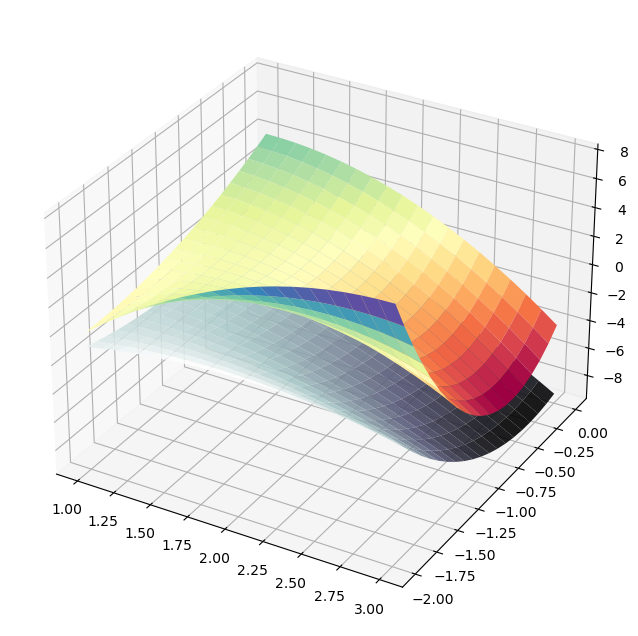

In [10]:
# в)
x = np.linspace(Point[0] - 1, Point[0] + 1, 20)
y = np.linspace(Point[1] - 1, Point[1] + 1, 20)
X, Y = np.meshgrid(x, y)
Z = X * Y**2 + 2*Y - X**2
Z_1 = (-2*X + Y**2)*(X - 2) + (Y + 1)*(2*X*Y + 2)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection = "3d")
surface_orig = ax.plot_surface(X, Y, Z, cmap = "bone", linewidth = 0, alpha = .9)
surface_tailor = ax.plot_surface(X, Y, Z_1, cmap = "Spectral", linewidth = 0)
plt.show()

In [11]:
# УПРАЖНЕНИЕ 6
# a)
x, y = sp.symbols("x y")
dx, dy = sp.symbols("dx dy")
z = x * y**2 + 2*y - x**2
dx_value, dy_value = 0.1, -0.2
Point = [2, -1]
diff_order = 2

# б)
for number, item in enumerate(find_differential(z, diff_order)):
    if number == 0: 
        print(f"function       : {item[0].expand()}")
    else: 
        print(f"{number}th differential : {item[0].expand()}")
    print("-----")
print("Function to be plotted :", find_Tailor_n(z, *Point, dx_value, dy_value, diff_order - 1)[1])
print("Function to be plotted :", find_Tailor_n(z, *Point, dx_value, dy_value, diff_order)[1])
print(f"z({Point[0]}  , {Point[1]}  ) =", z.subs([(x, 2), (y, -1)]))
print(f"z({Point[0] + dx_value}, {Point[1] + dy_value}) = {z.subs([(x, 2 + 0.1), (y, -1 - 0.2)]):.4f}")
print(f"z({Point[0] + dx_value}, {Point[1] + dy_value}) ~ {find_Tailor_n(z, *Point, dx_value, dy_value, diff_order)[0]:.4f} <- Tailor to 2nd order")
print("--------------")
print(f"z({Point[0] + dx_value}, {Point[1] + dy_value}) ~ {find_Tailor_n(z, *Point, dx_value, dy_value, 1)[0]:.4f} <- Tailor 1st")
print(f"z({Point[0] + dx_value}, {Point[1] + dy_value}) ~ {find_Tailor_n(z, *Point, dx_value, dy_value, 2)[0]:.4f} <- Tailor 2nd")
print(f"z({Point[0] + dx_value}, {Point[1] + dy_value}) ~ {find_Tailor_n(z, *Point, dx_value, dy_value, 3)[0]:.4f} <- Tailor 3rd")
print(f"z({Point[0] + dx_value}, {Point[1] + dy_value}) ~ {find_Tailor_n(z, *Point, dx_value, dy_value, 4)[0]:.4f} <- Tailor 4th")

function       : -x**2 + x*y**2 + 2*y
-----
1th differential : -2*dx*x + dx*y**2 + 2*dy*x*y + 2*dy
-----
2th differential : -2*dx**2 + 4*dx*dy*y + 2*dy**2*x
-----
Function to be plotted : (-2*x + y**2)*(x - 2) + (y + 1)*(2*x*y + 2)
Function to be plotted : (-2*x + y**2)*(x - 2) + (x - 2)*(-2*x + 2*y*(y + 1) + 4)/2 + (y + 1)*(2*x*y + 2) + (y + 1)*(2*x*(y + 1) + 2*y*(x - 2))/2
z(2  , -1  ) = -4
z(2.1, -1.2) = -3.7860
z(2.1, -1.2) ~ -3.7900 <- Tailor to 2nd order
--------------
z(2.1, -1.2) ~ -3.9000 <- Tailor 1st
z(2.1, -1.2) ~ -3.7900 <- Tailor 2nd
z(2.1, -1.2) ~ -3.7860 <- Tailor 3rd
z(2.1, -1.2) ~ -3.7860 <- Tailor 4th


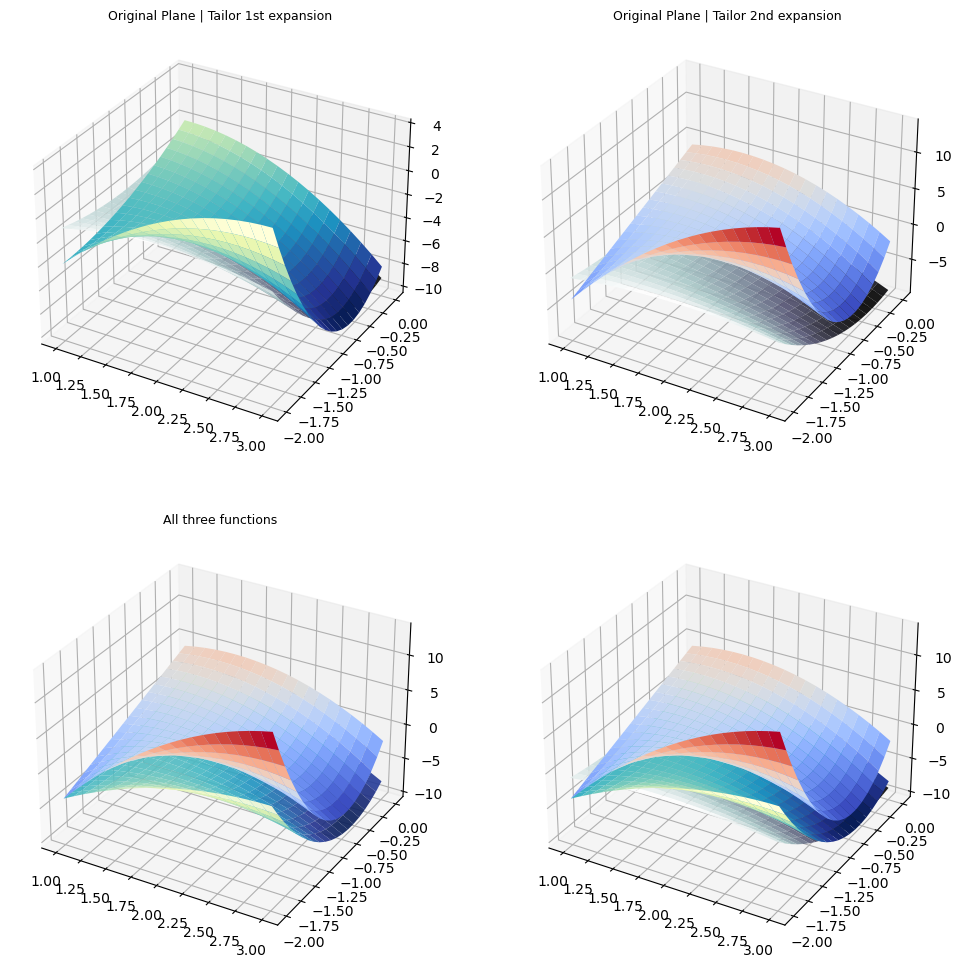

In [12]:
# в)
x = np.linspace(Point[0] - 1, Point[0] + 1, 20)
y = np.linspace(Point[1] - 1, Point[1] + 1, 20)
X, Y = np.meshgrid(x, y)
Z = X * Y**2 + 2*Y - X**2
Z_1 = (-2*X + Y**2)*(X - 2) + (Y + 1)*(2*X*Y + 2) - 4
Z_2 = (-2*X + Y**2)*(X - 2) + (X - 2)*(-2*X + 2*Y*(Y + 1) + 4)/2 + (Y + 1)*(2*X*Y + 2) + (Y + 1)*(2*X*(Y + 1) + 2*Y*(X - 2))/2

fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(221, projection = "3d")
ax2 = fig.add_subplot(222, projection = "3d")
ax3 = fig.add_subplot(223, projection = "3d")
ax4 = fig.add_subplot(224, projection = "3d")
surface_orig     = ax1.plot_surface(X, Y, Z, cmap = "bone", linewidth = 0, alpha = .9)
surface_tailor_1 = ax1.plot_surface(X, Y, Z_1, cmap = cm.YlGnBu_r, linewidth = 0)

surface_orig     = ax2.plot_surface(X, Y, Z, cmap = "bone", linewidth = 0, alpha = .9)
surface_tailor_2 = ax2.plot_surface(X, Y, Z_2, cmap = "coolwarm", linewidth = 0)

surface_tailor_1 = ax3.plot_surface(X, Y, Z_1, cmap = cm.YlGnBu_r, linewidth = 0, alpha = .9)
surface_tailor_2 = ax3.plot_surface(X, Y, Z_2, cmap = "coolwarm", linewidth = 0)

surface_orig = ax4.plot_surface(X, Y, Z, cmap = "bone", linewidth = 0, alpha = 0.9)
surface_tailor_1 = ax4.plot_surface(X, Y, Z_1, cmap = cm.YlGnBu_r, linewidth = 0)
surface_tailor_2 = ax4.plot_surface(X, Y, Z_2, cmap = "coolwarm", linewidth = 0)

ax1.set_title("Original Plane | Tailor 1st expansion", fontsize = 9)
ax2.set_title("Original Plane | Tailor 2nd expansion", fontsize = 9)
ax3.set_title("Tailor 1st expansion | Tailor 2nd expansion", fontsize = 9)
ax3.set_title("All three functions", fontsize = 9)

plt.show()

In [13]:
# ИНДИВИДУАЛЬНОЕ ЗАДАНИЕ
# № 4
x, y = sp.symbols("x y")
dx, dy = sp.symbols("dx dy")
z = (x**2 + 2*y**2)**4
dx_value, dy_value = -0.2, 0.2
Point = [1, 2]

print(find_Tailor(z, *Point, dx, dy))
for i in range(3):
    print(f"Differential : {find_differential(z, i)[i]}")
    print(f"Order = {i} : {find_Tailor_n(z, *Point, dx_value, dy_value, i)[0]:.4f}", "|", find_Tailor_n(z, *Point, dx, dy, i)[1])
    print()
print(z.subs([ (x, Point[0] + dx_value), (y, Point[1] + dy_value) ]))

(8*dx*x*(x**2 + 2*y**2)**3 + 16*dy*y*(x**2 + 2*y**2)**3 + 6561, 9720*dx**2 + 31104*dx*dy + 73872*dy**2 + 6561)
Differential : [(x**2 + 2*y**2)**4]
Order = 0 : 6561.0000 | 0

Differential : [8*dx*x*(x**2 + 2*y**2)**3 + 16*dy*y*(x**2 + 2*y**2)**3]
Order = 1 : 10060.2000 | 8*x*(x - 1)*(x**2 + 2*y**2)**3 + 16*y*(x**2 + 2*y**2)**3*(y - 2)

Differential : [dx*(48*dx*x**2*(x**2 + 2*y**2)**2 + 8*dx*(x**2 + 2*y**2)**3 + 96*dy*x*y*(x**2 + 2*y**2)**2) + dy*(96*dx*x*y*(x**2 + 2*y**2)**2 + 192*dy*y**2*(x**2 + 2*y**2)**2 + 16*dy*(x**2 + 2*y**2)**3)]
Order = 2 : 11109.9600 | 8*x*(x - 1)*(x**2 + 2*y**2)**3 + 16*y*(x**2 + 2*y**2)**3*(y - 2) + (x - 1)*(48*x**2*(x - 1)*(x**2 + 2*y**2)**2 + 96*x*y*(x**2 + 2*y**2)**2*(y - 2) + 8*(x - 1)*(x**2 + 2*y**2)**3)/2 + (y - 2)*(96*x*y*(x - 1)*(x**2 + 2*y**2)**2 + 192*y**2*(x**2 + 2*y**2)**2*(y - 2) + 16*(x**2 + 2*y**2)**3*(y - 2))/2

11342.7612057600


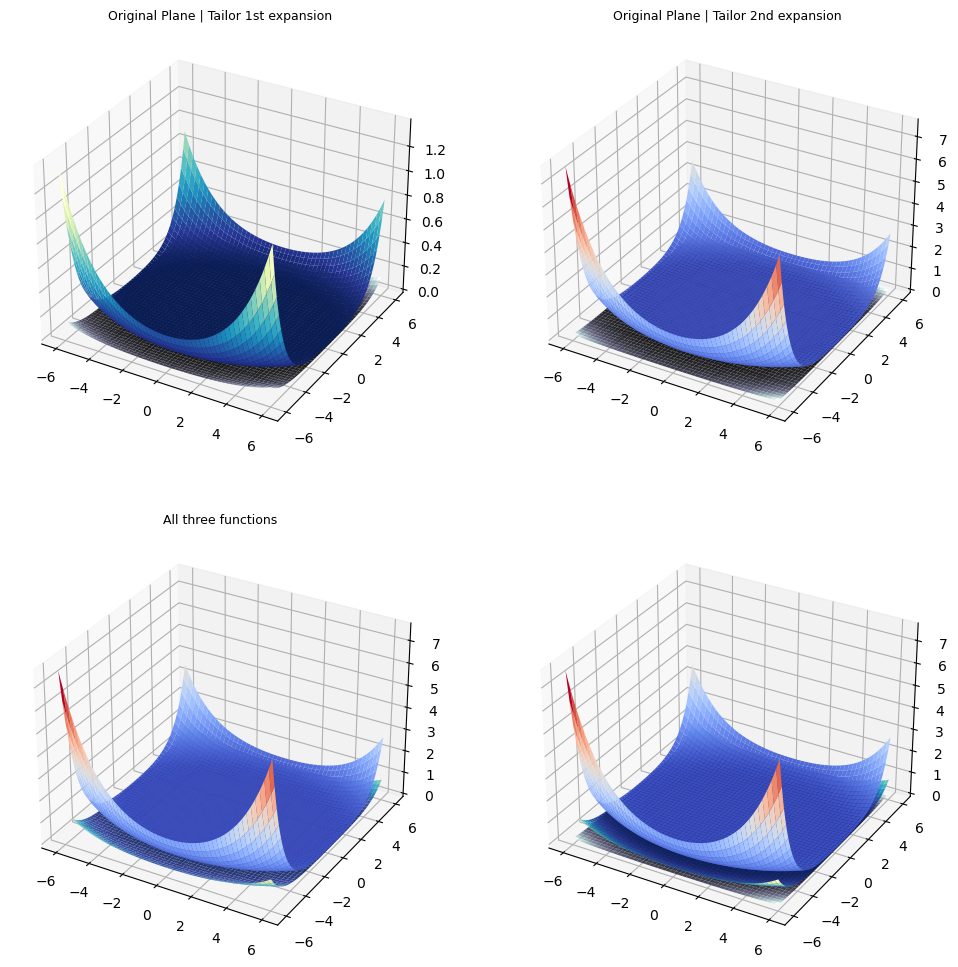

In [14]:
# в)
X = np.linspace(-6, 6, 200)
Y = np.linspace(-6, 6, 200)
x, y = np.meshgrid(X, Y)
z = (x**2 + 2*y**2)**4
z_1 = 8*x*(x - 1)*(x**2 + 2*y**2)**3 + 16*y*(x**2 + 2*y**2)**3*(y - 2)
z_2 = 8*x*(x - 1)*(x**2 + 2*y**2)**3 + 16*y*(x**2 + 2*y**2)**3*(y - 2) + (x - 1)*(48*x**2*(x - 1)*(x**2 + 2*y**2)**2 + 96*x*y*(x**2 + 2*y**2)**2*(y - 2) + 8*(x - 1)*(x**2 + 2*y**2)**3)/2 + (y - 2)*(96*x*y*(x - 1)*(x**2 + 2*y**2)**2 + 192*y**2*(x**2 + 2*y**2)**2*(y - 2) + 16*(x**2 + 2*y**2)**3*(y - 2))/2

C = np.linspace(-1, 10, 10)
X, Y, Z, Z_1, Z_2 = x, y, z, z_1, z_2

fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(221, projection = "3d")
ax2 = fig.add_subplot(222, projection = "3d")
ax3 = fig.add_subplot(223, projection = "3d")
ax4 = fig.add_subplot(224, projection = "3d")

surface_orig     = ax1.plot_surface(X, Y, Z, cmap = "bone", linewidth = 0, alpha = .9)
surface_tailor_1 = ax1.plot_surface(X, Y, Z_1, cmap = cm.YlGnBu_r, linewidth = 0)
const = ax1.plot(np.ones_like(C), np.ones_like(C), C, linewidth = 5)

surface_orig     = ax2.plot_surface(X, Y, Z, cmap = "bone", linewidth = 0, alpha = .9)
surface_tailor_2 = ax2.plot_surface(X, Y, Z_2, cmap = "coolwarm", linewidth = 0)

surface_tailor_1 = ax3.plot_surface(X, Y, Z_1, cmap = cm.YlGnBu_r, linewidth = 0, alpha = .9)
surface_tailor_2 = ax3.plot_surface(X, Y, Z_2, cmap = "coolwarm", linewidth = 0)

surface_orig     = ax4.plot_surface(X, Y, Z, cmap = "bone", linewidth = 0, alpha = 0.9)
surface_tailor_1 = ax4.plot_surface(X, Y, Z_1, cmap = cm.YlGnBu_r, linewidth = 0)
surface_tailor_2 = ax4.plot_surface(X, Y, Z_2, cmap = "coolwarm", linewidth = 0)

ax1.set_title("Original Plane | Tailor 1st expansion", fontsize = 9)
ax2.set_title("Original Plane | Tailor 2nd expansion", fontsize = 9)
ax3.set_title("Tailor 1st expansion | Tailor 2nd expansion", fontsize = 9)
ax3.set_title("All three functions", fontsize = 9)

plt.show()

In [15]:
# УПРАЖНЕНИЕ 1С
r, t, p  = sp.symbols("r t p")
x = r * sp.cos(t) * sp.cos(p)
y = r * sp.cos(t) * sp.sin(p)
z = r * sp.sin(t)

A = sp.Matrix([[x, y, z]])
J = sp.Matrix([ [sp.diff(A, r)],  [sp.diff(A, t)],  [sp.diff(A, p)] ])

sp.pprint(J)
sp.pprint(J.det().simplify())
# ВЕРНО

⎡ cos(p)⋅cos(t)     sin(p)⋅cos(t)     sin(t) ⎤
⎢                                            ⎥
⎢-r⋅sin(t)⋅cos(p)  -r⋅sin(p)⋅sin(t)  r⋅cos(t)⎥
⎢                                            ⎥
⎣-r⋅sin(p)⋅cos(t)  r⋅cos(p)⋅cos(t)      0    ⎦
  2       
-r ⋅cos(t)


In [16]:
# УПРАЖНЕНИЕ C2
x1, x2, x3, x4, x5 = sp.symbols("x1 x2 x3 x4 x5")
dx1, dx2, dx3, dx4, dx5 = sp.symbols("dx1 dx2 dx3 dx4 dx5")
f = x1 * x2 + x3**3 * x4**2 - x5**4
dx_values = [0.1, -0.2, 0.15, -0.1, 0.05]
Point =     [  2,   -1,    0,    1,   -2]
variables_ = [ x1,  x2,  x3,  x4,  x5]
diffs_     = [dx1, dx2, dx3, dx4, dx5]

def find_differential_fn(f, variables, diffs, order_arg):
    differentials = [[f]]
    for i in range(order_arg):
        differentials.append([])
    for order in range(order_arg):
        for func in differentials[order]:
            differential = 0
            for var_dif in range(len(variables)):
                differential += sp.diff(func, variables[var_dif]) * diffs[var_dif]
            differentials[order + 1].append(differential)
    return differentials   

for i in range(7):
    print(f"Differential : {find_differential_fn(f, variables_, diffs_, i)[i][0]}")
    print(f"OD sum : { sum( find_differential_fn(f, variables_, diffs_, i)[n][0].subs([(x1, Point[0]), (dx1, dx_values[0]), (x2, Point[1]), (dx2, dx_values[1]), (x3, Point[2]), (dx3, dx_values[2]), (x4, Point[3]), (dx4, dx_values[3]), (x5, Point[4]), (dx5, dx_values[4])]) / sp.factorial(n) for n in range(i + 1))}")
    print()
print("Exact value :", f.subs([ (x1, Point[0] + dx_values[0]), (x2, Point[1] + dx_values[1]), (x3, Point[2] + dx_values[2]), (x4, Point[3] + dx_values[3]), (x5, Point[4] + dx_values[4])  ]))

Differential : x1*x2 + x3**3*x4**2 - x5**4
OD sum : -18

Differential : dx1*x2 + dx2*x1 + 3*dx3*x3**2*x4**2 + 2*dx4*x3**3*x4 - 4*dx5*x5**3
OD sum : -16.9000000000000

Differential : 2*dx1*dx2 + dx3*(6*dx3*x3*x4**2 + 6*dx4*x3**2*x4) + dx4*(6*dx3*x3**2*x4 + 2*dx4*x3**3) - 12*dx5**2*x5**2
OD sum : -16.9800000000000

Differential : dx3*(dx3*(6*dx3*x4**2 + 12*dx4*x3*x4) + dx4*(12*dx3*x3*x4 + 6*dx4*x3**2)) + dx4*(6*dx3*dx4*x3**2 + dx3*(12*dx3*x3*x4 + 6*dx4*x3**2)) - 24*dx5**3*x5
OD sum : -16.9756250000000

Differential : dx3*(dx3*(12*dx3*dx4*x4 + dx4*(12*dx3*x4 + 12*dx4*x3)) + dx4*(12*dx3*dx4*x3 + dx3*(12*dx3*x4 + 12*dx4*x3))) + dx4*(12*dx3**2*dx4*x3 + dx3*(12*dx3*dx4*x3 + dx3*(12*dx3*x4 + 12*dx4*x3))) - 24*dx5**4
OD sum : -16.9763062500000

Differential : 120*dx3**3*dx4**2
OD sum : -16.9762725000000

Differential : 0
OD sum : -16.9762725000000

Exact value : -16.9762725000000
